## This Project is focusing on correcting the imbalance in dataset 

**Dataset information**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

So my aim is to balance the dataset to get good classification between fraud and normal transaction with any classification algorithm

The size of dataset is more than 25MB, which makes it difficult to upload on Github. But data is available on kaggle with this link https://www.kaggle.com/mlg-ulb/creditcardfraud

## 1. Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.Creating Dataframe with Creditcard dataset

In [38]:
df = pd.read_csv('creditcard.csv')

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Observing the imbalalnce in dataset 

**3.1 Checking the imbalalnce with respect to target Feature "Class"**

In [19]:
classification=df.Class.value_counts(sort= True)
classification

0    284315
1       492
Name: Class, dtype: int64

It indicates we very less data for Fraud cases 

**3.2 Visualizing data imbalance using the bar chart**

<function matplotlib.pyplot.show(close=None, block=None)>

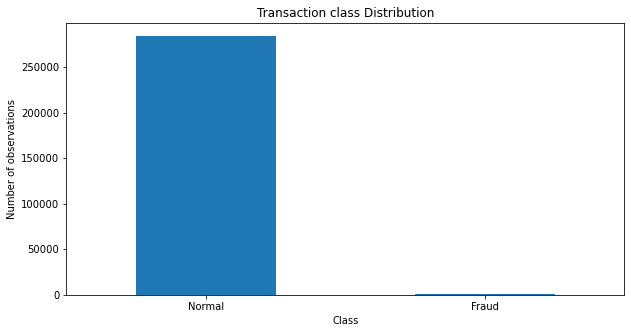

In [59]:
LABELS=('Normal','Fraud')
plt.figure(figsize=(10,5))
classification.plot(kind = 'bar',rot=0)
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.xticks(range(2), LABELS)
plt.title('Transaction class Distribution')
plt.show


## 4. Correcting the Imbalance in Dataset using Oversampling method

**4.1 Classifying Dependent and Independent variables**

In [40]:
y=df['Class']
X=df.drop('Class',axis=1)

In [41]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**4.2 Importing and fitting the SMOTETomek for oversampling on X and y**

In [42]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [44]:
X_res,y_res = smk.fit_sample(X,y)

**4.3 Observing the result of oversampling**

In [56]:
oversampling=y_res.value_counts()
oversampling

1    283783
0    283783
Name: Class, dtype: int64

We can see that data points for the Fraud transactions(Class==1) has been increased

**4.4 Visualizing the result of oversampling**

<function matplotlib.pyplot.show(close=None, block=None)>

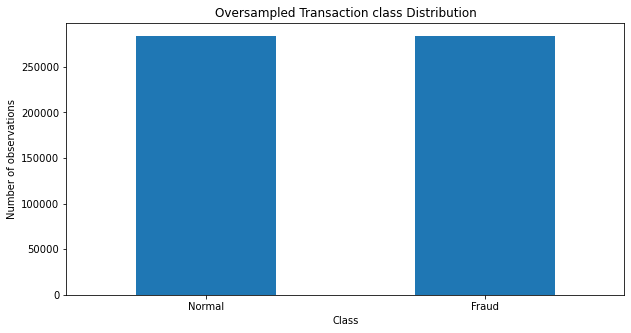

In [61]:
LABELS=('Normal','Fraud')
plt.figure(figsize=(10,5))
oversampling.plot(kind = 'bar',rot=0)
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.xticks(range(2), LABELS)
plt.title('Oversampled Transaction class Distribution')
plt.show

## 5. Correcting the Imbalance in Dataset using Undersampling method

**5.1 Importing and fitting the Nearmiss for Undersampling on X and y**

In [46]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [47]:
X_ndr,y_ndr = nm.fit_sample(X,y)

**5.2 Observing the result of undersampling**

In [57]:
undersampling=y_ndr.value_counts()
undersampling

1    492
0    492
Name: Class, dtype: int64

We can see that data points for the Normal transactions(Class==0) has been decreased

**5.3 Visualizing the result of undersampling**

<function matplotlib.pyplot.show(close=None, block=None)>

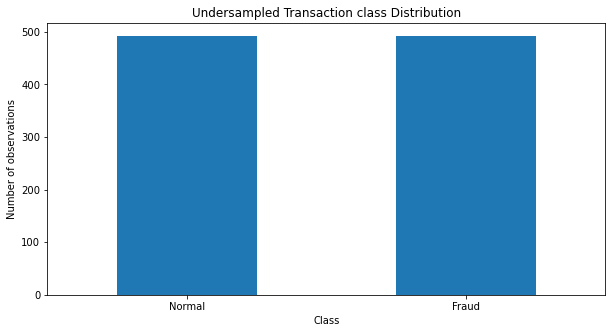

In [62]:
LABELS=('Normal','Fraud')
plt.figure(figsize=(10,5))
undersampling.plot(kind = 'bar',rot=0)
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.xticks(range(2), LABELS)
plt.title('Undersampled Transaction class Distribution')
plt.show